# #Amy Real State - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("Data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
CRIM       505 non-null float64
ZN         505 non-null float64
INDUS      505 non-null float64
CHAS       505 non-null int64
NOX        505 non-null float64
RM         505 non-null float64
AGE        505 non-null float64
DIS        505 non-null float64
RAD        505 non-null int64
TAX        505 non-null int64
PTRATIO    505 non-null float64
B          505 non-null float64
LSTAT      505 non-null float64
MEDV       505 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.3 KB


In [5]:
housing['CHAS'].value_counts()

0    470
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620625,11.386139,11.144832,0.069307,0.554865,6.284364,68.554455,3.792722,9.564356,408.566337,18.456832,356.594376,12.660020,22.534653
std,8.608589,23.340080,6.864761,0.254227,0.115930,0.703288,28.173012,2.107150,8.709391,168.541326,2.166895,91.367787,7.146426,9.206130
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,6.930000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.300000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26284da470>,
      dtype=object)

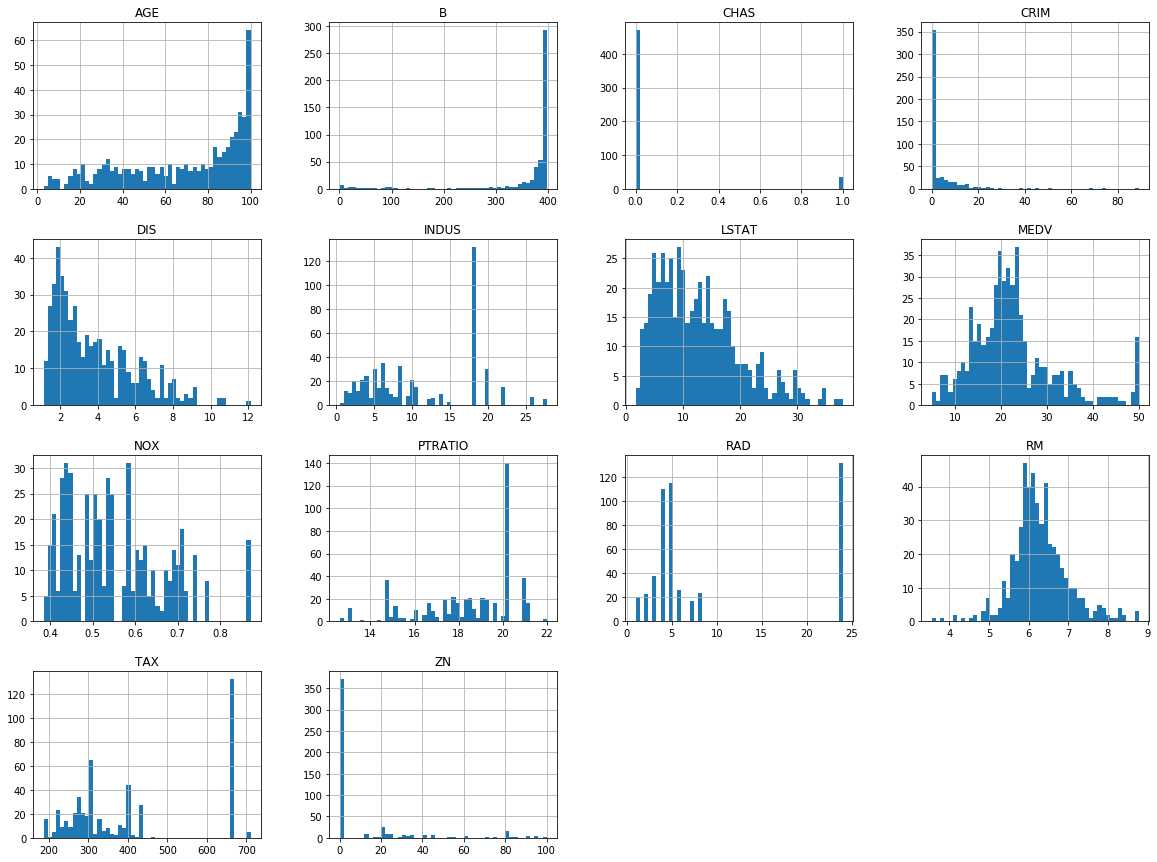

In [8]:
housing.hist(bins=50, figsize=(20, 15))

In [9]:
# for learning purpose
# import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
#train_set, test_set = split_train_test(housing, 0.2)

In [11]:
#print(f"Rows in train set: {len(train_set)}\n Rows in test set: {len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\n Rows in test set: {len(test_set)}\n")

Rows in train set: 404
 Rows in test set: 101



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
#strat_test_set['CHAS'].value_counts()

In [15]:
#strat_train_set['CHAS'].value_counts()

In [16]:
#94/7 and 376/28

In [17]:
housing = strat_train_set.copy()

Looking For Correlation

corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2624c67550>,
      dtype=object)

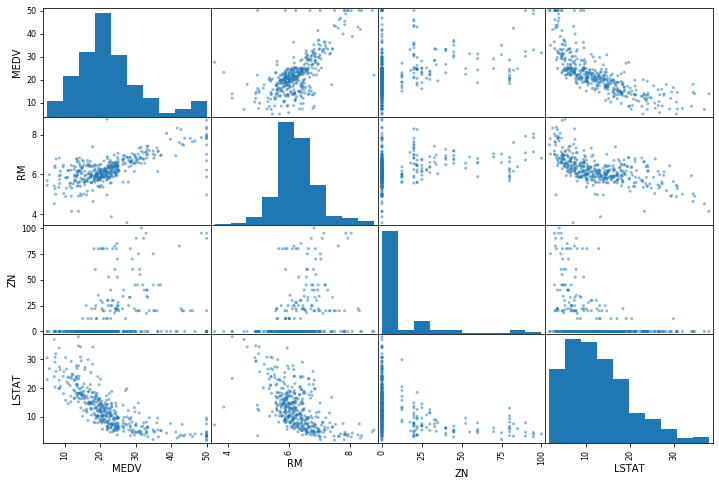

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12, 8))

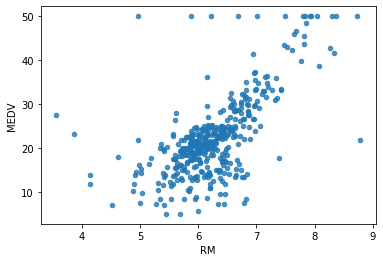

In [19]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

In [20]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [21]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25,20.9,53.607897
348,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6,48.277850
476,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0,125.565611
321,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70,20.4,47.508691
326,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2,47.180667


In [22]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.660868
B          0.344895
ZN         0.329297
DIS        0.231936
CHAS       0.214858
RAD       -0.363134
AGE       -0.378935
CRIM      -0.398268
NOX       -0.422316
TAX       -0.442413
INDUS     -0.448252
PTRATIO   -0.485465
TAXRM     -0.507277
LSTAT     -0.738849
Name: MEDV, dtype: float64

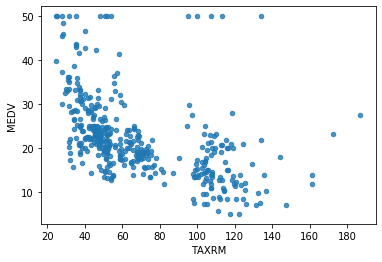

In [23]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [24]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

In [25]:
median= housing["RM"].median()

In [26]:
median

6.179

In [27]:
housing["RM"].fillna(median)

254    5.876
348    6.939
476    5.304
321    6.041
326    6.083
411    4.628
250    6.438
100    6.781
429    6.348
57     6.145
413    4.519
115    6.176
490    5.983
199    7.135
493    5.926
141    5.403
113    6.254
468    5.713
400    6.343
247    6.433
152    5.709
408    6.852
68     5.885
365    4.963
81     6.302
93     6.249
456    5.936
116    6.021
27     6.495
233    6.726
       ...  
433    6.208
430    6.833
479    6.242
438    5.627
38     6.595
18     5.727
97     7.820
266    8.297
133    5.757
449    6.749
477    6.185
171    5.572
180    6.144
158    6.510
279    7.820
109    6.195
82     6.167
386    5.000
418    6.824
126    5.693
446    6.251
101    6.405
276    6.826
405    4.138
367    4.970
154    6.152
423    5.565
98     7.416
455    5.976
215    5.888
Name: RM, Length: 404, dtype: float64

In [28]:
housing.shape


(404, 13)

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [30]:
imputer.statistics_

array([2.9025e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.1790e+00, 7.7150e+01, 3.1675e+00, 5.0000e+00, 3.3600e+02,
       1.9050e+01, 3.9094e+02, 1.1570e+01])

In [31]:
X = imputer.transform(housing)

In [32]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [33]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680681,10.233911,11.294183,0.069307,0.557445,6.252012,68.514109,3.776377,9.700495,411.561881,18.496535,353.522649,12.822995
std,8.249728,21.928354,6.829140,0.254290,0.116424,0.688936,28.428821,2.125189,8.756814,168.123946,2.123142,95.111003,7.207684
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.874750,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.320000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.179000,77.150000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,12.500000,18.100000,0.000000,0.625750,6.604500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Scikit-Learn Design

# Feature Scaling

Primarily, two types of feature scaling methods:

    1.Min-max scaling(Normlization)
      (value-min)/(max-min).
       Sklearn provides a class called MinMaxScaler for it.
    
    2.Standardization 
        (value-min)/std
        Sklearn provides a class called StandardScaler

# Creating a Pipeline


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [35]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [36]:
housing_num_tr


array([[-0.44240493,  3.18549186, -1.12220182, ..., -0.98869255,
         0.43852974, -0.49633492],
       [-0.4431926 ,  1.35910778, -1.47260659, ...,  0.5675352 ,
         0.38242047, -0.96308209],
       [ 1.37662515, -0.4672763 ,  0.99782039, ...,  0.80332729,
        -0.04255723,  1.67904028],
       ...,
       [-0.43838527, -0.4672763 , -1.23216148, ..., -0.23415788,
         0.4566363 , -0.92140823],
       [ 0.11992814, -0.4672763 ,  0.99782039, ...,  0.80332729,
        -3.61123302,  0.85945448],
       [-0.4411767 , -0.4672763 ,  0.38058017, ..., -0.98869255,
         0.41347532,  0.09543381]])

# Selecting a desired model for Amy Real States

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

/home/amit666/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [38]:
some_data = housing.iloc[:5]

In [39]:
some_labels = housing_labels.iloc[:5]

In [40]:
prepared_data = my_pipeline.transform(some_data)

In [41]:
model.predict(prepared_data)

array([20.48, 29.78, 12.34, 21.29, 21.25])

In [42]:
list(some_labels)

[20.9, 26.6, 12.0, 20.4, 22.2]

# Evaluating the model

In [43]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [44]:
rmse


1.4018392268094735

In [45]:
mse

1.9651532178217825

# using better evaluation technique- Cross Validation

In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)


In [47]:
rmse_scores

array([3.27511795, 2.8345697 , 5.24909702, 3.38876443, 2.81597319,
       2.85135363, 2.95624847, 3.01423373, 2.2827122 , 4.15408684])

In [48]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard-deviation: ", scores.std())

In [49]:
print_scores(rmse_scores)

Scores:  [3.27511795 2.8345697  5.24909702 3.38876443 2.81597319 2.85135363
 2.95624847 3.01423373 2.2827122  4.15408684]
Mean:  3.2822157156921703
Standard-deviation:  0.8012909450319293


# Saving the model

In [51]:
from joblib import dump, load
dump(model, 'Amy.joblib')

['Amy.joblib']

# Testing the model on test data

In [54]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
#print(final_predictions, list(Y_test))

[22.9  22.44 45.36 31.52 44.46 33.59 20.74 23.93 32.04 19.89 19.05 29.69
 21.95 33.68 18.37 20.44 13.62 20.05 27.53 19.42 20.04 43.98 13.   19.87
 26.01 31.32 16.99 16.55  7.18 20.6  23.42 22.68 19.24 15.13 21.64 19.43
 23.48 18.46 44.1  18.37 19.83 19.37 19.72 18.88 32.57  9.21 24.71 14.08
 21.19 21.76 47.61 23.   14.86 20.8  20.17 45.47 32.73 19.05 35.47  8.9
 23.44 36.55 32.16 23.6  13.37 21.04 21.17 15.31 27.76 24.45 23.5  31.56
 20.3  32.36 12.19 21.67 38.09 18.51 18.17 13.42 37.73  9.13 35.73 22.66
 27.48 14.76 23.74 22.39 19.82 15.04 26.56 12.34 30.84 13.36 27.41 20.17
 33.68 13.95 20.95 21.85 19.97] [24.6, 22.0, 44.8, 23.6, 48.8, 36.5, 19.7, 23.1, 34.6, 21.5, 23.1, 15.0, 23.0, 34.9, 18.5, 10.4, 10.2, 18.9, 23.9, 19.3, 19.4, 48.3, 10.9, 19.6, 27.5, 37.3, 16.1, 15.2, 10.5, 21.4, 23.2, 20.7, 21.7, 13.0, 22.3, 19.6, 21.2, 18.1, 50.0, 23.7, 22.6, 20.5, 18.9, 19.5, 32.7, 8.8, 29.1, 19.0, 22.6, 21.2, 50.0, 22.5, 17.8, 20.3, 20.4, 37.6, 35.4, 18.2, 33.3, 12.1, 23.1, 37.9, 36.1, 23.7, 1

In [53]:
final_rmse

3.405763315671868

In [55]:
prepared_data[0]

array([-0.44240493,  3.18549186, -1.12220182, -0.27288841, -1.42282087,
       -0.54646371, -1.7403247 ,  2.56479414, -0.99480054, -0.57506151,
       -0.98869255,  0.43852974, -0.49633492])

# using the model

In [56]:
from joblib import load, dump
model = load('Amy.joblib')
import numpy as np
features = np.array([[-0.44240493,  3.18549186, -1.12220182, -0.27288841, -1.42282087,
       -0.54646371, -1.3403247 ,  2.56479414, -0.99480054, -0.57506151,
       -0.98869255,  0.53852974, -0.49633492]])
model.predict(features)

array([20.6])